# Цель работы

Изучение алгоритмов и методов регрессии на практике.
# Вариант задания

Вариант №4.

Набор данных: regression.xlsx(лист “var4”).

Список объектов, состоящий из независимых переменных x1, x2 и зависимой переменной y.

salary.csv
Описание столбцов:

•	age — возраст сотрудника в годах;

•	income — годовой доход до текущей работы;

•	experience — количество полных лет профессионального опыта;

•	score_test — результат прохождения профессионального теста;

•	hours_worked — среднее количество рабочих часов в неделю;

•	distance_to_work — расстояние от дома до места работы;

•	savings — сумма сбережений на банковском счёте;

•	debt — общий объём текущих долгов (по кредитам, картам и другим обязательствам, в долларах);

•	education — уровень образования: «High School» (школа), «Bachelor» (бакалавр), «Master» (магистр) или «PhD» (доктор наук);

•	city — город проживания: Нью-Йорк, Лос-Анджелес, Чикаго, Хьюстон или Финикс;

•	job_type — сфера профессиональной деятельности: IT, финансы, здравоохранение, образование или ритейл;

•	marital_status — семейное положение: «Single» (холост/незамужем), «Married» (в браке) или «Divorced» (в разводе);

•	car — наличие автомобиля: «Yes» (есть) или «No» (нет);

•	remote_work — работает ли сотрудник удалённо: «Yes» или «No»;

•	salary — годовая зарплата.

# Ход выполнения работы
### 1. Чтение файла


In [1]:
import pandas as pd
df = pd.read_excel('./regression.xlsx')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   y       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


### 2. Обзор данных

In [3]:
df.describe()

,x1,x2,y
count,1000.000000,1000.000000,1000.000000
mean,-0.000004,0.000028,1.328769
std,1.155279,1.155227,1.615985
min,-1.999458,-1.998031,-2.722868
25%,-0.999670,-0.999294,0.072635
50%,0.000488,-0.000001,1.256896
75%,0.998817,0.999619,2.418257
max,1.999308,1.997041,5.734255


In [4]:
df.head(10)

,x1,x2,y
0,1.929428,1.511727,5.734255
1,-0.330281,-0.898878,-0.623706
2,0.688773,0.908247,1.028884
3,-0.008892,-0.518823,-0.894802
4,-1.698716,0.610347,2.822400
5,-0.269050,-0.341612,-1.093544
6,0.676858,0.686104,1.171928
7,0.742416,-0.720371,0.327117
8,-1.006270,1.235734,1.976935
9,-1.999458,-1.252385,2.453643


### 3. Обработка данных

In [5]:
print(df.isna().sum())

x1    0
x2    0
y     0
dtype: int64


In [6]:
print(df.duplicated().sum())

0


In [7]:
df.columns = df.columns.str.strip()

### 4. Простая линейная регрессия

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np

y = df['y']
X1 = df['x1']
X2 = df['x2']

X1_train, X1_valid, y1_train, y1_valid = train_test_split(
    X1,
    y,
    test_size=0.25,
    random_state=0
)

X2_train, X2_valid, y2_train, y2_valid = train_test_split(
    X2,
    y,
    test_size = 0.25,
    random_state=0
)

model1 = LinearRegression()
model2 = LinearRegression()

model1.fit(np.array(X1_train).reshape(-1,1), y1_train)
model2.fit(np.array(X2_train).reshape(-1,1), y2_train)

predictions_valid1 = model1.predict(np.array(X1_valid).reshape(-1,1))
predictions_valid2 = model2.predict(np.array(X2_valid).reshape(-1,1))

In [14]:
df_match1 = pd.DataFrame({'Actual':y1_valid, 'Predicted':predictions_valid1})
df_match2 = pd.DataFrame({'Actual':y2_valid, 'Predicted': predictions_valid2})

print("-"*16,"X1","-"*16)
print(df_match1.head())
print('\nMean Absolute Error (MAE): ', metrics.mean_absolute_error(y1_valid, predictions_valid1))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y1_valid, predictions_valid1))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y1_valid, predictions_valid1)))
print('R2: ', metrics.r2_score(y1_valid, predictions_valid1))
print('\n', '-'*16, 'X2', '-'*16)
print(df_match2.head())
print('\nMean Absolute Error (MAE): ', metrics.mean_absolute_error(y2_valid, predictions_valid2))
print('Mean Squared Error (MSE): ', metrics.mean_squared_error(y2_valid, predictions_valid2))
print('Root Mean Squared Error (RMSE): ', np.sqrt(metrics.mean_squared_error(y2_valid, predictions_valid2)))
print('R2: ', metrics.r2_score(y2_valid, predictions_valid2))

---------------- X1 ----------------
       Actual  Predicted
993  0.844976   1.318248
859  0.098286   1.320404
298  2.811529   1.318855
553 -1.135913   1.319729
672  0.361717   1.320126

Mean Absolute Error (MAE):  1.3052297465023817
Mean Squared Error (MSE):  2.6003799520568953
Root Mean Squared Error (RMSE):  1.6125693634870084
R2:  -0.0006880979831391798

 ---------------- X2 ----------------
       Actual  Predicted
993  0.844976  -0.197860
859  0.098286   1.383591
298  2.811529   2.427953
553 -1.135913   0.097441
672  0.361717   1.513103

Mean Absolute Error (MAE):  1.1436410697617028
Mean Squared Error (MSE):  1.8870176700933898
Root Mean Squared Error (RMSE):  1.3736876173618913
R2:  0.27383068706837455


In [15]:
x1_a = model1.coef_[0]
x1_b = model1.intercept_

x2_a = model2.coef_[0]
x2_b = model2.intercept_

print("----X1----")
print('a = ', x1_a)
print('b = ', x1_b)
print('----X2----')
print('a = ', x2_a)
print('b = ', x2_b)

----X1----
a =  -0.001110045120477482
b =  1.3198796913347404
----X2----
a =  0.8231572337226742
b =  1.3121437725275613


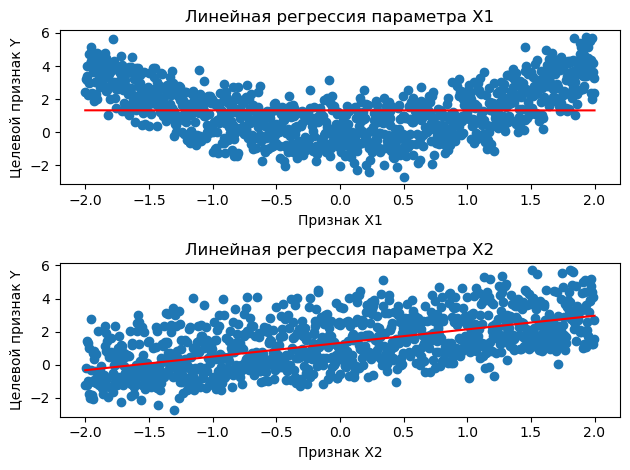

In [16]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1)
ax[0].scatter(df['x1'], df['y'])
ax[0].plot([-2, 2], [x1_a*(-2)+x1_b, x1_a*2+x1_b], 'r')
ax[0].set_title("Линейная регрессия параметра X1")
ax[0].set_xlabel("Признак X1")
ax[0].set_ylabel("Целевой признак Y")

ax[1].scatter(df['x2'], df['y'])
ax[1].plot([-2, 2], [x2_a*(-2)+x2_b, x2_a*2+x2_b], 'r')
ax[1].set_title("Линейная регрессия параметра X2")
ax[1].set_xlabel("Признак X2")
ax[1].set_ylabel("Целевой признак Y")
fig.tight_layout()